In [406]:
import torch
import torch.nn.functional as F
import random

from tqdm import tqdm

 ## E01: Tune the hyperparameters of the training to beat my best validation loss of 2.2

In [407]:
words = open("video_2_dependencies/names.txt").read().splitlines()
words

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn',
 'abigail',
 'emily',
 'elizabeth',
 'mila',
 'ella',
 'avery',
 'sofia',
 'camila',
 'aria',
 'scarlett',
 'victoria',
 'madison',
 'luna',
 'grace',
 'chloe',
 'penelope',
 'layla',
 'riley',
 'zoey',
 'nora',
 'lily',
 'eleanor',
 'hannah',
 'lillian',
 'addison',
 'aubrey',
 'ellie',
 'stella',
 'natalie',
 'zoe',
 'leah',
 'hazel',
 'violet',
 'aurora',
 'savannah',
 'audrey',
 'brooklyn',
 'bella',
 'claire',
 'skylar',
 'lucy',
 'paisley',
 'everly',
 'anna',
 'caroline',
 'nova',
 'genesis',
 'emilia',
 'kennedy',
 'samantha',
 'maya',
 'willow',
 'kinsley',
 'naomi',
 'aaliyah',
 'elena',
 'sarah',
 'ariana',
 'allison',
 'gabriella',
 'alice',
 'madelyn',
 'cora',
 'ruby',
 'eva',
 'serenity',
 'autumn',
 'adeline',
 'hailey',
 'gianna',
 'valentina',
 'isla',
 'eliana',
 'quinn',
 'nevaeh',
 'ivy',
 'sadie',
 'piper',
 'lydia',
 'alexa',
 'josephine',
 'emery',
 'julia'

In [408]:
chars = sorted(list(set("".join(words))))
stoi = {char:idx+1 for idx, char in enumerate(chars)}
stoi["."] = 0
itos = {idx: char for char, idx in stoi.items()}

In [409]:
stoi

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

In [410]:
def build_dataset(words):
    context_length = 3
    X = []
    Y = []
    for word in words:
        word += "."
        window = ["."] * context_length
        for ch in word:
            x = [stoi[chr] for chr in window]
            y = stoi[ch]
            X.append(x)
            Y.append(y)
            window = window[1:] + [ch]
    return torch.tensor(X), torch.tensor(Y)

In [411]:
random.seed(42)
random.shuffle(words)

In [412]:
words

['yuheng',
 'diondre',
 'xavien',
 'jori',
 'juanluis',
 'erandi',
 'phia',
 'samatha',
 'phoenix',
 'emmelynn',
 'hollan',
 'hollis',
 'callalily',
 'adelayde',
 'josephyne',
 'weldon',
 'kayle',
 'ragnar',
 'colbie',
 'taveon',
 'aki',
 'peyten',
 'kevari',
 'joella',
 'mecca',
 'egan',
 'justyce',
 'taliyah',
 'hayley',
 'alleah',
 'kymberlynn',
 'parrish',
 'houstyn',
 'jamaya',
 'ahmod',
 'nivin',
 'milli',
 'cristiana',
 'jaimee',
 'mitchell',
 'nairah',
 'lorena',
 'gentrie',
 'torrion',
 'savian',
 'benjamine',
 'airess',
 'knute',
 'sultana',
 'danai',
 'azzan',
 'issabelle',
 'abrahim',
 'aislyn',
 'aerys',
 'malaiya',
 'kieon',
 'ayansh',
 'berklee',
 'emmakate',
 'avaneesh',
 'amenadiel',
 'renardo',
 'brekken',
 'kamry',
 'wylin',
 'trixie',
 'breslynn',
 'bianka',
 'mordchai',
 'haoyu',
 'frankie',
 'josselin',
 'saila',
 'kionna',
 'jennings',
 'arlington',
 'jupiter',
 'aleisha',
 'kemorah',
 'denisse',
 'zada',
 'kaydynce',
 'bari',
 'darya',
 'ellieanne',
 'gretel',
 

In [413]:
idx1 = int(len(words)*0.8)
idx2 = int(len(words)*0.9)

print(idx1, idx2)


25626 28829


In [414]:
x_tr, y_tr = build_dataset(words[:idx1])
x_val, y_val = build_dataset(words[idx1:idx2])
x_te, y_te = build_dataset(words[idx2:])

In [415]:
len(x_tr), len(x_val), len(x_te)

(182625, 22655, 22866)

In [416]:
len(x_tr) + len(x_val) + len(x_te)

228146

In [417]:
x_tr, y_tr

(tensor([[ 0,  0,  0],
         [ 0,  0, 25],
         [ 0, 25, 21],
         ...,
         [15, 12,  4],
         [12,  4,  1],
         [ 4,  1, 14]]),
 tensor([25, 21,  8,  ...,  1, 14,  0]))

In [418]:
g = torch.Generator().manual_seed(2147483647) 
C = torch.randn((27, 15), generator=g)
W1 = torch.randn((45, 300), generator=g)
b1 = torch.randn(300, generator=g)
W2 = torch.randn((300, 27), generator=g)
b2 = torch.randn(27, generator=g)

parameters = [C, W1, b1, W2, b2]

In [419]:
sum([p.nelement() for p in parameters])

22332

In [420]:
for p in parameters:
    p.requires_grad = True

In [421]:
epochs = 200000
epoch_record = []
loss_record = []

lrs = torch.arange(0.1, 0, (0 - 0.1)/epochs)

for epoch in tqdm(range(epochs)):
    # b_idx = torch.randperm(len(x_tr))[:32]
    b_idx = torch.randint(0, x_tr.shape[0], (32,))
    emb = C[x_tr[b_idx]]
    h = torch.tanh(emb.view(-1, 45) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, y_tr[b_idx])

    for p in parameters:
        p.grad = None
    
    loss.backward()

    lr = lrs[epoch]

    for p in parameters:
        p.data -= lr*p.grad

    epoch_record.append(epoch)
    loss_record.append(loss.item())

100%|██████████| 200000/200000 [00:59<00:00, 3361.58it/s]


In [422]:
print(loss_record[0])

31.510364532470703


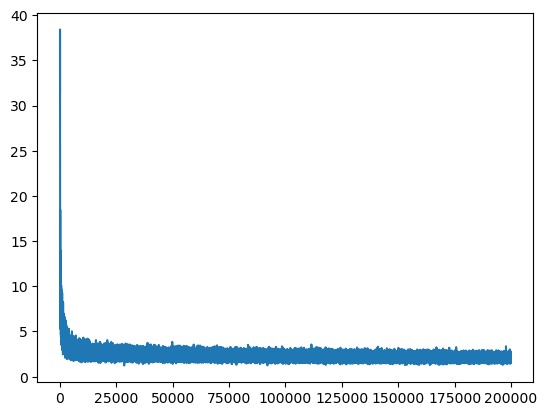

In [423]:
import matplotlib.pyplot as plt

plt.plot(epoch_record, loss_record)

In [424]:
emb = C[x_tr]
h = torch.tanh(emb.view(-1, 45) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, y_tr)
print(loss)

tensor(2.0702, grad_fn=<NllLossBackward0>)


In [425]:
emb = C[x_val]
h = torch.tanh(emb.view(-1, 45) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, y_val)
print(loss)

tensor(2.1444, grad_fn=<NllLossBackward0>)


Using higher hidden dims, embedding dims, and linearly decaying LR improved Val Loss

 ## E02: I was not careful with the intialization of the network in this video. (1) What is the loss you'd get if the predicted probabilities at initialization were perfectly uniform? What loss do we achieve? (2) Can you tune the initialization to get a starting loss that is much more similar to (1)?

If predicted probabilities were perfectly uniform, then each token has the same chance of being outputted, 1/27. The achieved loss is below...

In [441]:
-torch.log(torch.tensor(1/27))

tensor(3.2958)

In [426]:
g = torch.Generator().manual_seed(2147483647) 
C = torch.randn((27, 15), generator=g)
W1 = torch.randn((45, 300), generator=g)
b1 = torch.randn(300, generator=g)
W2 = torch.tensor(0.001).repeat(300, 27)  #Ensure weights and biases for each output token are uniform, will ensure outputs have the same value
b2 = torch.tensor(0.001).repeat(27)

parameters = [C, W1, b1, W2, b2]

In [427]:
for p in parameters:
    p.requires_grad = True

In [428]:
epochs = 200000
epoch_record = []
loss_record = []
lrs = torch.arange(0.1, 0, (0 - 0.1)/epochs)

for epoch in tqdm(range(epochs)):
    # b_idx = torch.randperm(len(x_tr))[:32]
    b_idx = torch.randint(0, x_tr.shape[0], (32,))
    emb = C[x_tr[b_idx]]
    h = torch.tanh(emb.view(-1, 45) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, y_tr[b_idx])

    for p in parameters:
        p.grad = None
    
    loss.backward()

    lr = lrs[epoch]

    for p in parameters:
        p.data -= lr*p.grad

    epoch_record.append(epoch)
    loss_record.append(loss.item())

100%|██████████| 200000/200000 [00:59<00:00, 3385.83it/s]


In [430]:
print(torch.mean(torch.tensor(loss_record[:1])))

tensor(3.2958)


Can seen first epoch has the expected loss of 3.29 and no hockey stick in graph below...

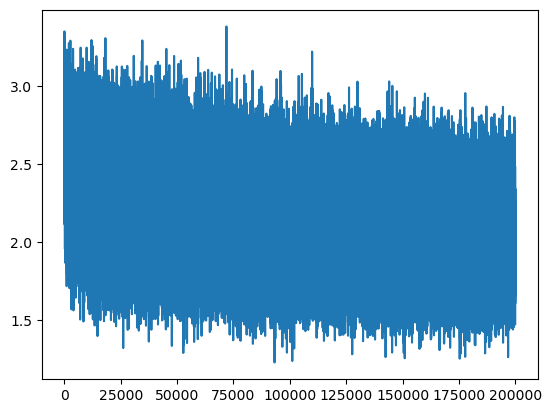

In [431]:
import matplotlib.pyplot as plt

plt.plot(epoch_record, loss_record)

In [432]:
emb = C[x_tr]
h = torch.tanh(emb.view(-1, 45) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, y_tr)
print(loss)

tensor(2.0127, grad_fn=<NllLossBackward0>)


In [433]:
emb = C[x_val]
h = torch.tanh(emb.view(-1, 45) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, y_val)
print(loss)

tensor(2.1050, grad_fn=<NllLossBackward0>)


 ## E03: Read the Bengio et al 2003 paper (link above), implement and try any idea from the paper. Did it work?

Will be adding direct connections of the embeddings to the output layer

In [434]:
g = torch.Generator().manual_seed(2147483647) 
C = torch.randn((27, 15), generator=g)
W1 = torch.randn((45, 300), generator=g)
b1 = torch.randn(300, generator=g)
W2_1 = torch.tensor(0.001).repeat(300, 27)
W2_2 = torch.tensor(0.001).repeat(45, 27)
b2 = torch.tensor(0.001).repeat(27)

parameters = [C, W1, b1, W2_1, W2_2, b2]

In [435]:
for p in parameters:
    p.requires_grad = True

In [436]:
epochs = 200000
epoch_record = []
loss_record = []
lrs = torch.arange(0.1, 0, (0 - 0.1)/epochs)

for epoch in tqdm(range(epochs)):
    b_idx = torch.randint(0, x_tr.shape[0], (32,))
    emb = C[x_tr[b_idx]]
    h = torch.tanh(emb.view(-1, 45) @ W1 + b1)
    logits = h @ W2_1 + emb.view(-1, 45) @ W2_2 + b2
    loss = F.cross_entropy(logits, y_tr[b_idx])
    
    for p in parameters:
        p.grad = None
    
    loss.backward()

    lr = lrs[epoch]

    for p in parameters:
        p.data -= lr*p.grad

    epoch_record.append(epoch)
    loss_record.append(loss.item())

100%|██████████| 200000/200000 [00:59<00:00, 3344.71it/s]


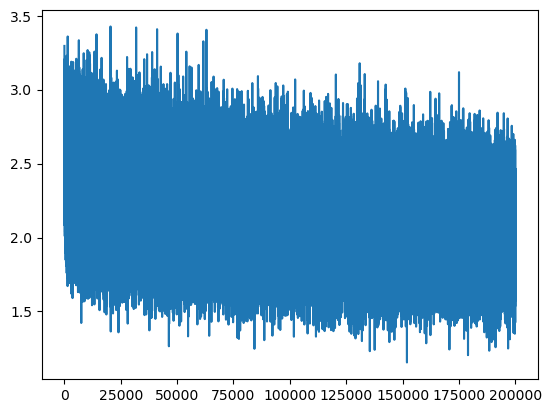

In [437]:
import matplotlib.pyplot as plt

plt.plot(epoch_record, loss_record)

In [438]:
emb = C[x_tr]
h = torch.tanh(emb.view(-1, 45) @ W1 + b1)
logits = h @ W2_1 + emb.view(-1, 45) @ W2_2 + b2
loss = F.cross_entropy(logits, y_tr)
print(loss)

tensor(2.0136, grad_fn=<NllLossBackward0>)


In [439]:
emb = C[x_val]
h = torch.tanh(emb.view(-1, 45) @ W1 + b1)
logits = h @ W2_1 + emb.view(-1, 45) @ W2_2 + b2
loss = F.cross_entropy(logits, y_val)
print(loss)

tensor(2.1018, grad_fn=<NllLossBackward0>)


Direct Connections help provided the best VAL performance

In [440]:
emb = C[x_te]
h = torch.tanh(emb.view(-1, 45) @ W1 + b1)
logits = h @ W2_1 + emb.view(-1, 45) @ W2_2 + b2
loss = F.cross_entropy(logits, y_te)
print(loss)

tensor(2.0995, grad_fn=<NllLossBackward0>)
